### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.mixture for Gaussian Mixture Model
- data_spliter for splitting the data into training and testing sets
- matplotlib.pyplot for plotting the data

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [11]:
x = np.load("Xtrain_Classification1.npy")
y = np.load("ytrain_Classification1.npy")

x =(x).astype('float32')/255.0

print(x.shape)
print(y.shape)

x, X_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(x.shape, X_test.shape, y.shape, y_test.shape)

(6254, 2352)
(6254,)
(5003, 2352) (1251, 2352) (5003,) (1251,)


In [12]:
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(x, y)

print(X_train_resampled.shape, y_train_resampled.shape)

x = x.reshape(-1, 28,28,3)
X_train_resampled = X_train_resampled.reshape(-1, 28,28,3)
X_test = X_test.reshape(-1, 28,28,3)


(8560, 2352) (8560,)


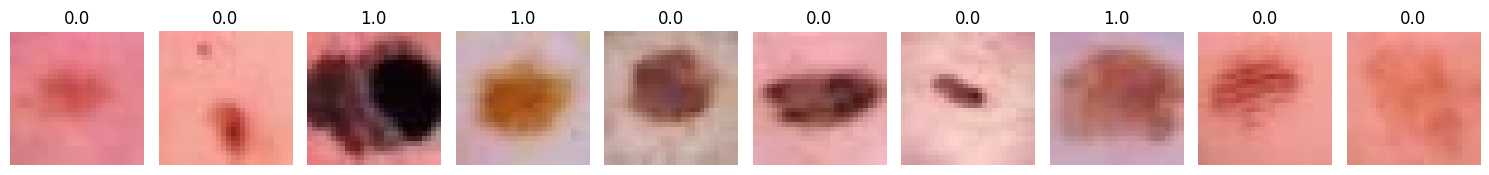

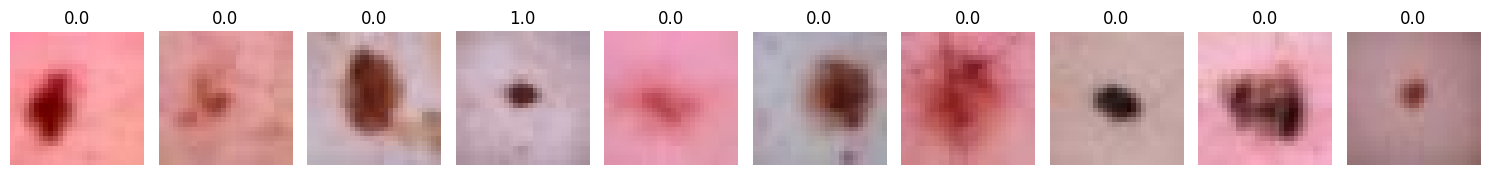

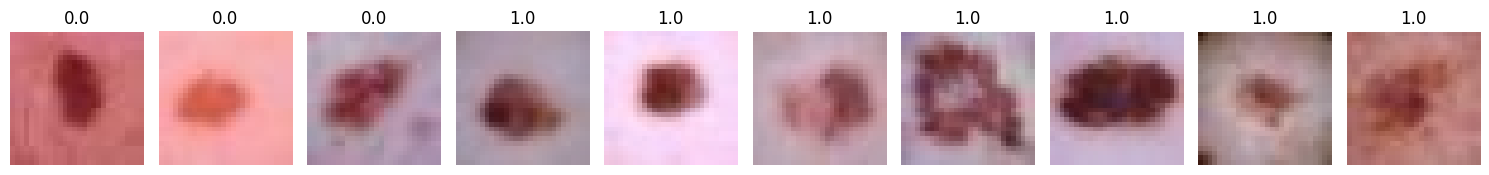

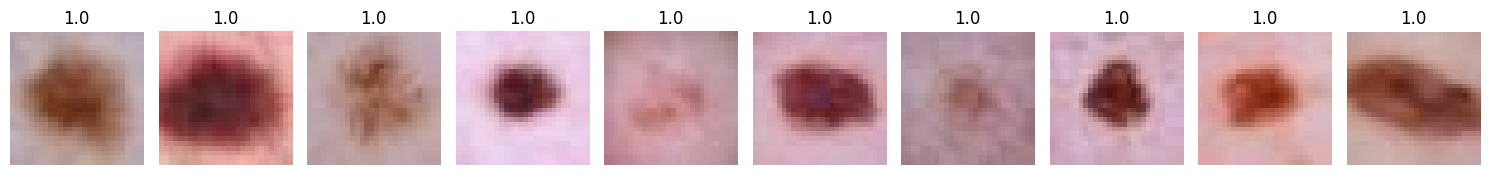

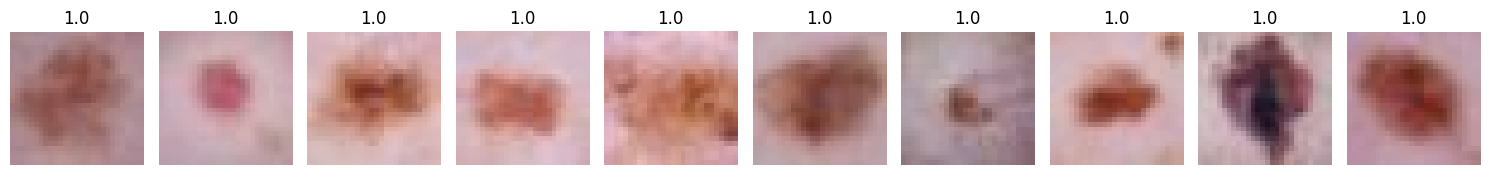

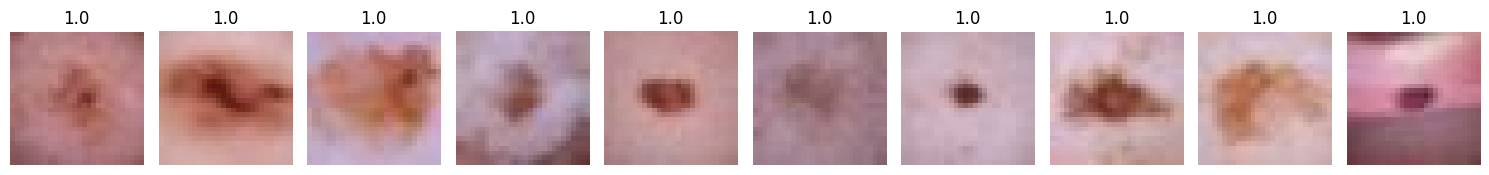

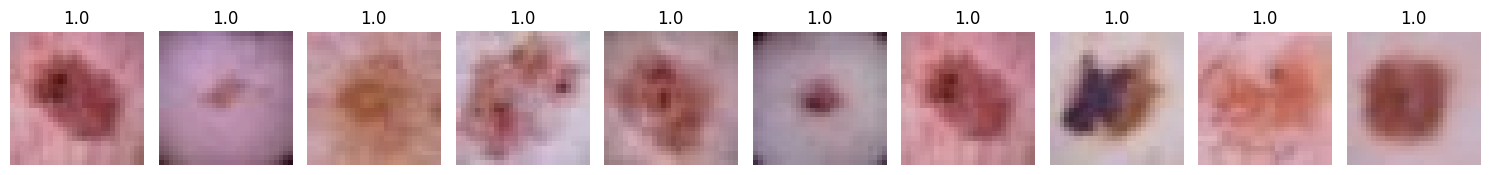

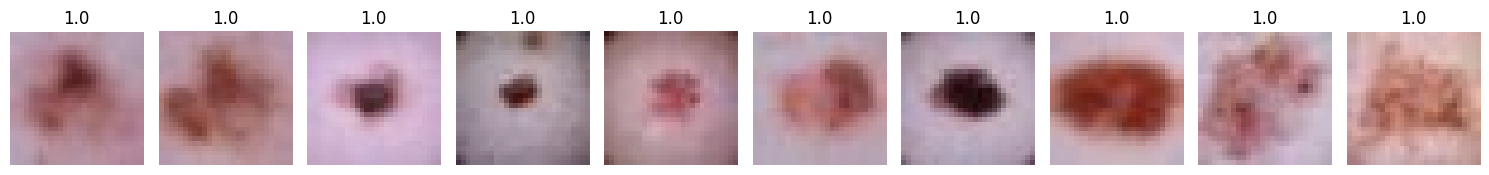

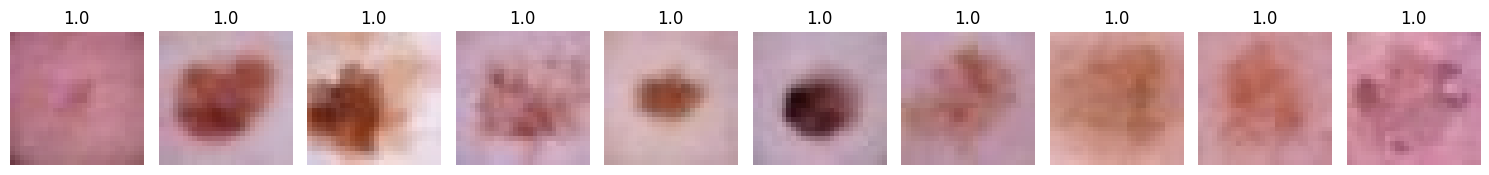

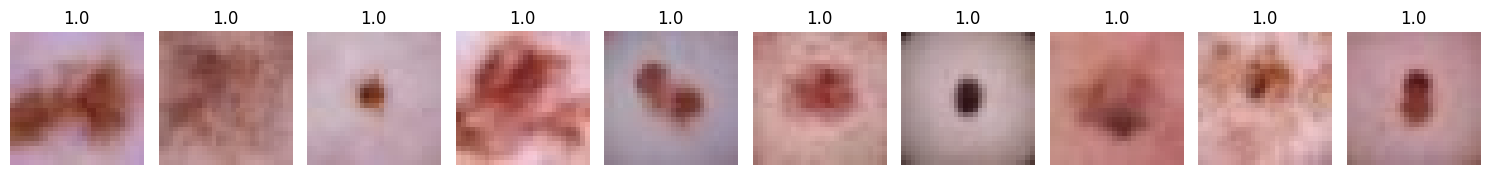

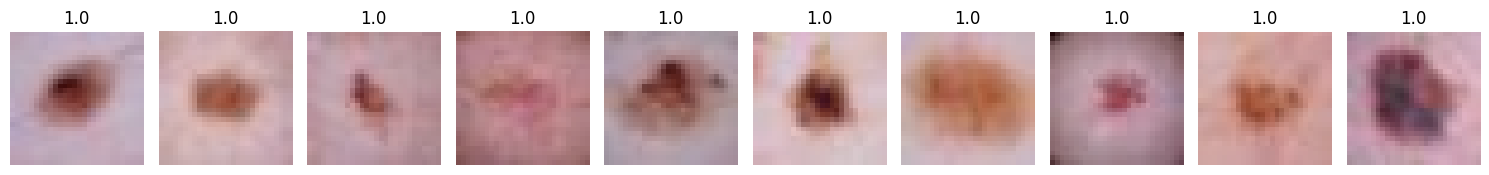

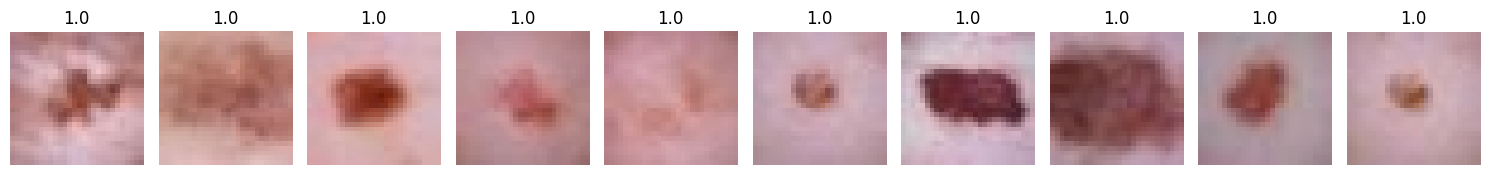

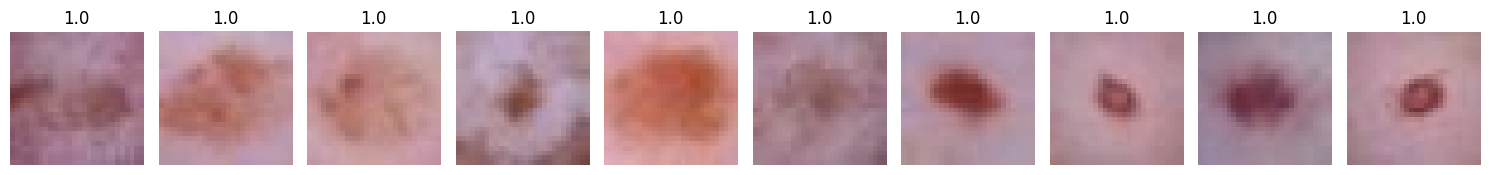

In [13]:
for i in range(0,10*(1+1),10):
    fig, axs = plt.subplots(1, 10, figsize=(15, 3))  # 1 row, 6 columns

    for j, ax in enumerate(axs):
        ax.imshow(np.stack([x[i+j][:,:,0], x[i+j][:,:,1], x[i+j][:,:,2]], axis=-1))
        ax.axis('off')  # Turn off axis for each subplot
        ax.set_title(y[i+j])
    # Show the plot
    plt.tight_layout()  # Adjust the spacing between subplots for a better layout
    plt.show()

print("=====================================================================================================")

for i in range(5000,5000 + 1*(10+1),10):
    fig, axs = plt.subplots(1, 10, figsize=(15, 3))  # 1 row, 6 columns

    for j, ax in enumerate(axs):
        ax.imshow(np.stack([X_train_resampled[i+j][:,:,0], X_train_resampled[i+j][:,:,1], X_train_resampled[i+j][:,:,2]], axis=-1))
        ax.axis('off')  # Turn off axis for each subplot
        ax.set_title(y_train_resampled[i+j])
    # Show the plot
    plt.tight_layout()  # Adjust the spacing between subplots for a better layout
    plt.show()
 

In [14]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

y_train_resampled = tf.keras.utils.to_categorical(y_train_resampled,2)
y_test = tf.keras.utils.to_categorical(y_test,2)

print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test.shape)
print(y_test.shape)

np.save('x_smote.npy', X_train_resampled)
np.save('y_smote.npy', y_train_resampled)
np.save('x_test.npy', X_test)
np.save('y_test.npy', y_test)


{0.0: 4280, 1.0: 4280}
{0.0: 1078, 1.0: 173}
(8560, 28, 28, 3)
(8560, 2)
(1251, 28, 28, 3)
(1251, 2)
